<a href="https://www.kaggle.com/code/maheswarareddyp/pytorch-basics?scriptVersionId=137264859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch

In [2]:
x = torch.Tensor(10).random_(0, 10)
#x.to('cuda')
x.to('cpu')

tensor([2., 3., 9., 1., 8., 6., 5., 1., 7., 5.])

In [3]:
#torch.cuda.is_avialbale()
# to check GPU's in a  system

In [4]:
tensor1 = torch.Tensor([1,2,3,4])
print (tensor1)
tensor1.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [5]:
tensor1 = torch.Tensor([[1,2,3,4],[5,6,7,8]])
print (tensor1)

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])


In [6]:
tensor1.shape

torch.Size([2, 4])

In [7]:
e1 = torch.randn(3,3)
e1

tensor([[ 1.6902, -1.2188, -0.4559],
        [-1.0943, -1.0065,  0.3321],
        [ 0.2042, -0.3596,  0.3494]])

In [8]:
e2 = torch.randint(low= 0, high= 10, size = (3,3)).type(torch.FloatTensor)
e2

tensor([[5., 3., 9.],
        [5., 1., 2.],
        [2., 1., 5.]])

In [9]:
a = torch.tensor([5.0, 3.0], requires_grad=True)
b = torch.tensor([1.0, 4.0])
ab = ((a + b) ** 2).sum()
ab.backward()

In [10]:
ab.grad

/tmp/ipykernel_20/1459142135.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  ab.grad


In [11]:
a.grad.data

tensor([12., 14.])

In [12]:
import torch.nn as nn
input_units = 10
hidden_units = 3
output_units = 1
model = nn.Sequential(nn.Linear(input_units, hidden_units), \
                      nn.ReLU(), \
                      nn.Linear(hidden_units, output_units), \
                      nn.Sigmoid())
loss_funct = nn.MSELoss()

In [13]:
print (loss_funct)

MSELoss()


In [14]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [16]:
x = torch.randn(20, 10)
x

tensor([[-7.2229e-01, -2.5018e-02, -8.5038e-01,  2.8360e-01, -5.3066e-01,
         -1.2489e-01, -8.8096e-01,  8.6460e-01,  1.1552e+00,  2.1761e-01],
        [ 1.6954e-01,  1.2103e+00, -5.4397e-01, -2.1487e+00, -7.2405e-01,
         -1.1302e+00,  3.2768e-01,  1.2519e-01, -1.0099e-01, -2.1038e+00],
        [ 1.0160e+00,  7.3671e-01,  1.3822e+00,  8.5212e-01,  5.5446e-01,
          1.0099e+00, -9.9547e-02, -5.0547e-01,  8.7947e-01, -1.7244e-02],
        [-3.0372e-02,  1.7229e-01, -5.7019e-01,  1.4941e+00, -4.0399e-02,
         -3.4534e-02, -8.3081e-01,  4.7475e-02,  4.8860e-01, -1.4461e+00],
        [-6.1219e-01, -1.9771e-01, -7.6592e-01, -4.2018e-01,  9.4580e-01,
          8.5617e-01, -2.4204e-01, -6.9175e-01, -5.0315e-01,  1.9252e-03],
        [-3.6293e-01,  1.4577e-01,  1.1172e-01,  2.2759e-01,  8.7444e-01,
         -7.2033e-01,  5.9724e-01, -8.9266e-01,  4.5009e-01,  7.6827e-02],
        [ 1.0288e+00,  2.8888e-01,  9.8395e-01, -6.8638e-01, -5.6137e-01,
          1.2194e+00,  1.6744e+0

In [17]:
y = torch.randint(0, 2, (20,1)).type(torch.FloatTensor)
y

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.]])

In [18]:
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [19]:
losses = []
for i in range(500):
    y_pred = model(x)
    loss = loss_funct(y_pred, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        print(i, loss.item())

0 0.31171587109565735
100 0.07211102545261383
200 0.028371736407279968
300 0.014435621909797192
400 0.007848125882446766


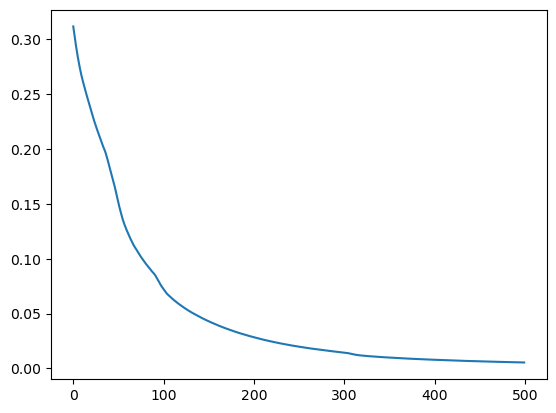

In [20]:
plt.plot(range(0,500), losses)
plt.show()

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np

In [22]:
data = pd.read_csv("/kaggle/input/simplenn/SomervilleHappinessSurvey2015.csv", encoding='utf-16')
data.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [23]:
train_features = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
train_labels = data[['D']]

In [24]:
train_features.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [25]:
train_labels.head()

,D
0,0
1,0
2,1
3,0
4,0


In [26]:
torch_tensor = torch.tensor(train_features.values, dtype=torch.float32)

In [27]:
torch_tensor_label = torch.tensor(train_labels.values, dtype=torch.float32)

In [28]:
torch_tensor_label

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
      

In [29]:
in_fea = 6
hid_fea = 3
out = 1

model = nn.Sequential(nn.Linear(in_fea, hid_fea), \
                     nn.ReLU(), \
                     nn.Linear(hid_fea, out), \
                     nn.Sigmoid())
loss_funct = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

In [30]:
losses = []
for i in range(100):
    y_pred = model(torch_tensor)
    loss = loss_funct(y_pred, torch_tensor_label)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%10 == 0:
        print(i, loss.item())

0 0.24604003131389618
10 0.2390531599521637
20 0.23563317954540253
30 0.23349809646606445
40 0.2315196394920349
50 0.22933928668498993
60 0.2271214723587036
70 0.22501735389232635
80 0.2232980877161026
90 0.22201228141784668


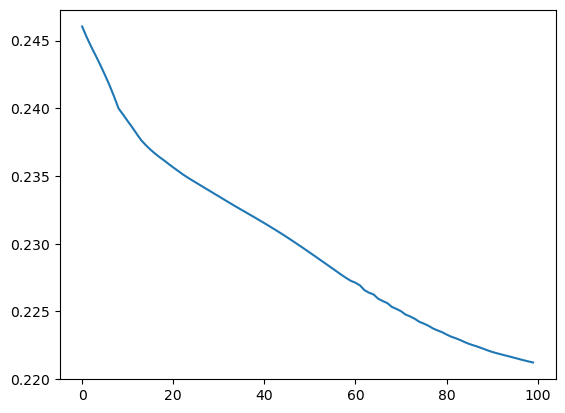

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(0,100), losses)
plt.show()